In [1]:
# 这部分代码是用来设置一些绘图的参数和导入必要的库，每次启动内核时都需要运行
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import product
import pandas as pd
import numpy as np
import numba as nb
import imageio
import os
import shutil

randomSeed = 100

%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.jet(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(
    style="ticks", 
    font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['animation.ffmpeg_path'] = "/opt/conda/bin/ffmpeg"

from main import *
from multiprocessing import Pool
import pandas as pd

# colors = ["#403990", "#80A6E2", "#FBDD85", "#F46F43", "#CF3D3E"]
# cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)

colors = ["#403990", "#80A6E2", "#FBDD85", "#F46F43", "#CF3D3E"]
cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
cmap_r = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors[::-1])

SAVE_PATH = r"./data"

In [2]:
# 这里是一个模型的实例, 可以调整不同的参数多跑跑看
model = ChiralActiveMatterWithNoise(
    strengthLambda=0.95,   # 耦合强度 lambda
    distanceD0=2,          # 耦合距离 D0
    noiseRateAlpha=0.5,    # 空间噪声强度 alpha
    noiseRateBeta=0.5,     # 相位噪声强度 beta
    savePath=SAVE_PATH,    # 保存路径
    overWrite=True         # 是否覆盖已有缓存
)

In [8]:
# 这里是模型的计算执行函数，输入的参数是模型的迭代次数(演化时间), 运行完毕后会在data文件夹下生成对应的数据文件
# 完整运行一次生成缓存数据后，下次可以直接读取数据文件，不用再次运行模型
model.run(30000)

In [4]:
# 这里是模型的可视化函数，用于生成动画，输入的参数是模型的实例，运行完毕后会在当文件夹mp4下生成一个mp4文件
# 注意这里的模型实例必须是已经执行过计算的(即已经run过，在data文件夹中有模型的数据文件, 而run过的模型不用重复run)
draw_mp4(model)

  0%|          | 0/4 [00:00<?, ?it/s]

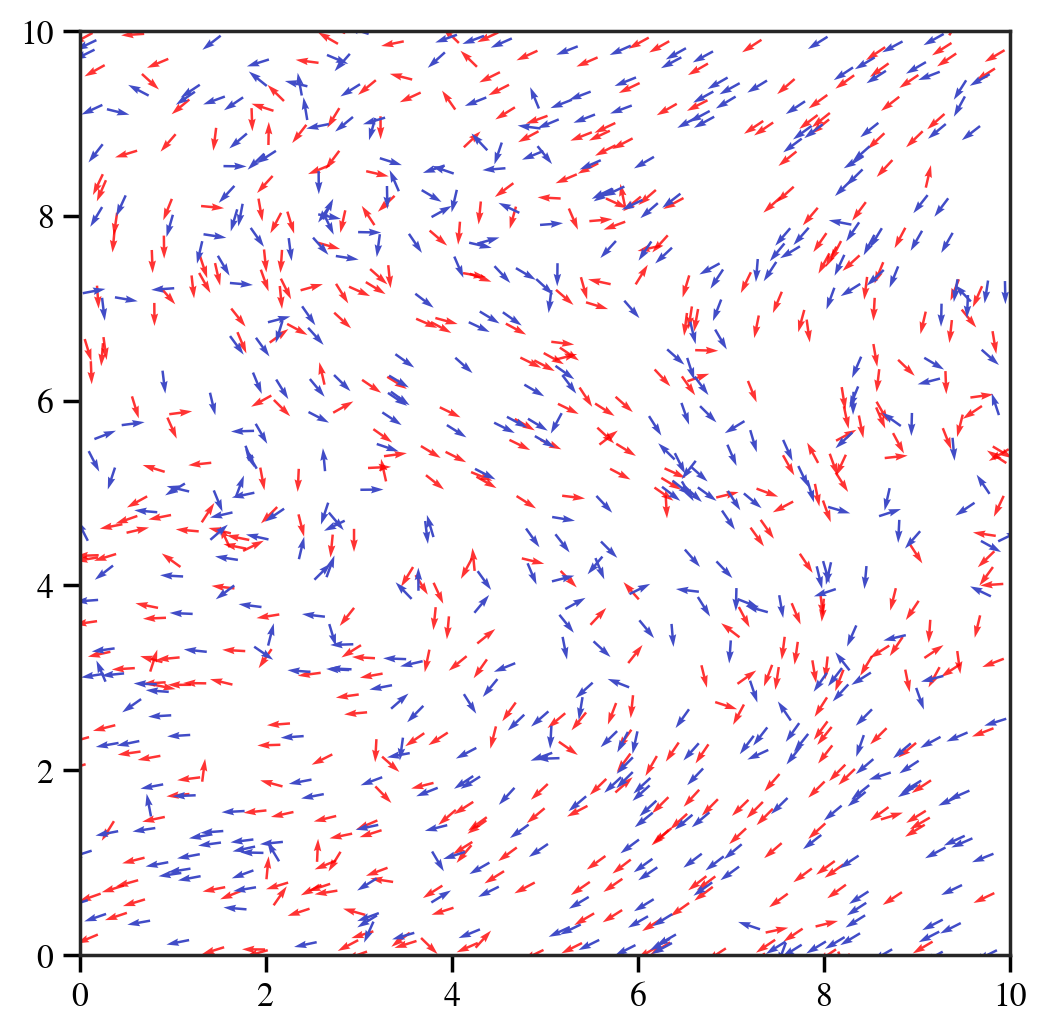

In [3]:
# StateAnalysis是一个用于分析模型状态的类
# plot_spatial是StateAnalysis下的一个模型的可视化函数，用于生成指定帧的空间分布图，默认生成最后一帧(-1)的空间分布图
# 注意这里的模型实例必须是已经执行过计算的(即已经model.run过，在data文件夹中有模型的数据文件, 而run过的模型不用重复run)
sa = StateAnalysis(model)
sa.plot_spatial(index=-1)